## Logistic Regression


Sigmoid Function

$$
g(z) = \frac{1}{1 + e^{-z}}
$$
Parameters
$$
W = 
\begin{bmatrix} 
w_0 \\
w_1 \\
w_2 
\end{bmatrix}
$$
Hypothesis
$$
h = 
g(XW) =
g(
\begin{bmatrix} 
1 & x_{01} & x_{02}\\
1 & x_{11} & x_{12}\\
1 & x_{21} & x_{22}\\
1 & x_{31} & x_{32}\\
1 & x_{41} & x_{42}
\end{bmatrix}
\begin{bmatrix} 
w_0 \\
w_1 \\
w_2 
\end{bmatrix}
)
=
\begin{bmatrix} 
g(w_0 + w_1 x_{01} + w_2 x_{02})\\
g(w_0 + w_1 x_{11} + w_2 x_{12})\\
g(w_0 + w_1 x_{21} + w_2 x_{22})\\
g(w_0 + w_1 x_{31} + w_2 x_{32})\\
g(w_0 + w_1 x_{41} + w_2 x_{42})\\
\end{bmatrix}
=
\begin{bmatrix} 
h_{0} \\
h_{1} \\
h_{2} \\
h_{3} \\
h_{4}
\end{bmatrix}
$$


Cost Function
$$
J(W) = \frac{1}{2m} \sum_{i=1}^{m} (h_i - y_i)^2
= \frac{1}{2m} \sum_{i=1}^{m} (g(w_0 + w_1 x_{i1} + w_2 x_{i2}) - y_i)^2
$$

Derivative of Cost Funnction
$$
\frac{dJ(W)}{dw_j} = 
\sum_{i=1}^{m}
\frac{dJ(W)}{dh_i} \frac{dh_i}{dz_i}  \frac{dz_i}{dw_j}
=  
\sum_{i=1}^{m}
\frac{1}{m} (h_i - y_i)
\frac{dh_i}{dz_i}  \frac{dz_i}{dw_j}
=
\frac{1}{m}
\sum_{i=1}^{m}
(h_i - y_i)
h_i (1- h_i)
\frac{dz_i}{dw_j}
=
\frac{1}{m} \sum_{i=1}^{m} 
(h_i - y_i)
h_i (1- h_i)
x_{ij}
$$

Derivative of Cost Funnction
$$
\frac{dJ(W)}{dw} = 
\begin{bmatrix} 
\frac{dJ(W)}{dw_0} \\
\frac{dJ(W)}{dw_1} \\
\frac{dJ(W)}{dw_2}
\end{bmatrix}
=
\frac{1}{m}
\begin{bmatrix} 
\sum_{i=1}^{m} (h_i - y_i) h_i (1- h_i) x_{i0} \\
\sum_{i=1}^{m} (h_i - y_i) h_i (1- h_i) x_{i1} \\
\sum_{i=1}^{m} (h_i - y_i) h_i (1- h_i) x_{i2}
\end{bmatrix}
$$

![](data/myclassifier.png)



In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def sigmoid(z):
    return(1 / (1 + np.exp(-z)))

W = np.array([[1],[1],[1]]) 
X = np.array([[1,0,0],[1,1,1],[1,2,2],[1,3,3],[1,4,4],[1,5,5]])
y = np.array([[0],[0],[0],[0],[1],[1]]) 
h = sigmoid(X.dot(W))
m, n = X.shape
cost = np.sum(np.power(h-y,2))/ (2*m)
derivative = np.sum(X * (h-y) * h * (1-h), axis=0)/ m
print("W:\n", W)
print("X:\n", X)
print("y:\n", y)
print("h:\n", h)
print("cost:\n", cost)
print("derivative for every w_j:\n", derivative)
derivative.shape

W:
 [[1]
 [1]
 [1]]
X:
 [[1 0 0]
 [1 1 1]
 [1 2 2]
 [1 3 3]
 [1 4 4]
 [1 5 5]]
y:
 [[0]
 [0]
 [0]
 [0]
 [1]
 [1]]
h:
 [[0.73105858]
 [0.95257413]
 [0.99330715]
 [0.99908895]
 [0.99987661]
 [0.9999833 ]]
cost:
 0.28555682900130047
derivative for every w_j:
 [0.03238032 0.00982823 0.00982823]


(3,)

In [2]:
class myClassification():
    def __init__(self,X_train, y_train):
        self.m, self.n = X_train.shape
        self.n += 1 # Add one for x_0 column 
        
        self.X_train = np.hstack((np.ones((self.m,1)), X_train))
        self.y_train = y_train.reshape((self.m,1))
        self.W = np.random.randn(self.n,1)
            
    def cost(self):
        h = sigmoid(self.X_train.dot(self.W))
        return np.sum(np.power(h-self.y_train,2))/ (2*self.m)

    def derivative(self):
        h = sigmoid(self.X_train.dot(self.W))
        derivative = np.sum(self.X_train * (h-self.y_train) * h * (1-h) , axis=0)/ self.m
        return derivative.reshape(self.W.shape)

    def gradient_descent(self, alpha = 0.05, number_steps = 10000):
        for i in range(number_steps):
            self.W = self.W - alpha * self.derivative()
        return self.W
    
    def predict(self, X_test, threshold=0.5):
        m, n = X_test.shape
        X_test = np.hstack((np.ones((m,1)), X_test))
        h = sigmoid(X_test.dot(self.W)) 
        p = h >= threshold
        return (p.astype('int'))

    def fit(self):
        self.W = self.gradient_descent()

The following code and data is taken from https://www.udemy.com/machinelearning/



[[65  3]
 [ 8 24]]


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


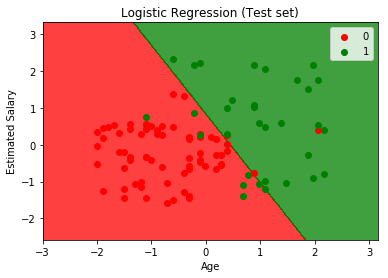

In [7]:
# Logistic Regression
# Importing the dataset
dataset = pd.read_csv('data/Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [4]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
me = myClassification(X_train, y_train)
me.fit()
me_pred = me.predict(X_test)

cm = confusion_matrix(y_test, me_pred)
print(cm)

[[64  4]
 [ 6 26]]


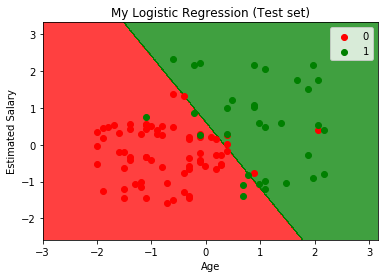

In [6]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, me.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('My Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

For a different machine learning task look at
 - https://www.datacamp.com/community/tutorials/time-series-analysis-tutorial
